In [1]:
import pandas as pd
import plotly.express as px

In [38]:
f = "../data/co2-intensity.csv"
co2 = pd.read_csv(f)


paises_ejemplo = ["Denmark","Spain","Germany","Mexico", "United States"]
nombres = {
    "Denmark":"Dinamarca",
    "Spain":"España",
    "Germany":"Alemania",
    "Mexico":"México",
    "United States":"EUA"
}
co2_ejemplo = co2[(co2.Entity.isin(paises_ejemplo) & (co2.Year >= 1970))]
# co2_ejemplo["Entity"] = co2_ejemplo.Entity.replace(nombres)
co2_ejemplo.columns

C:\Users\gbv\AppData\Local\Temp\ipykernel_20592\2720534047.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Index(['Entity', 'Code', 'Year',
       'Annual CO₂ emissions per GDP (kg per international-$)'],
      dtype='object')

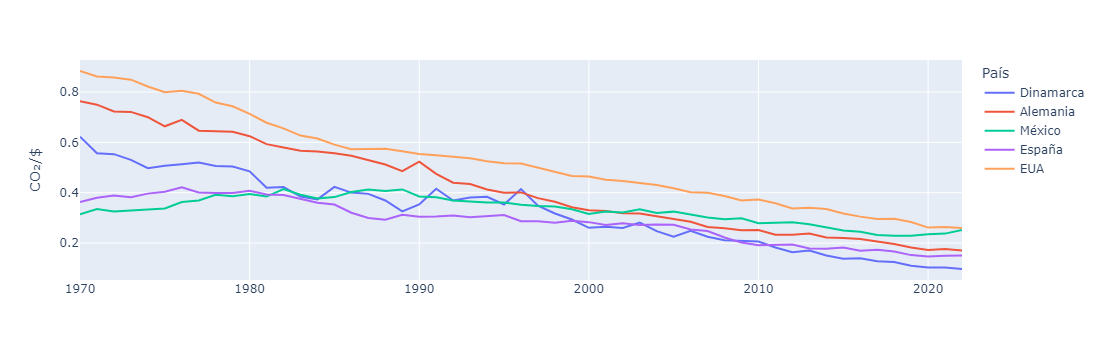

In [34]:

# Creación de la gráfica
fig = px.line(co2_ejemplo, x='Year', y='Annual CO₂ emissions per GDP (kg per international-$)', color='Entity',
              labels={
                  'Year': '',
                 'Annual CO₂ emissions per GDP (kg per international-$)': 'CO₂/$',
                  'Entity': 'País'
              }
             )

# Mostrar la gráfica
fig.show()


C:\Users\gbv\AppData\Local\Temp\ipykernel_20592\929015394.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



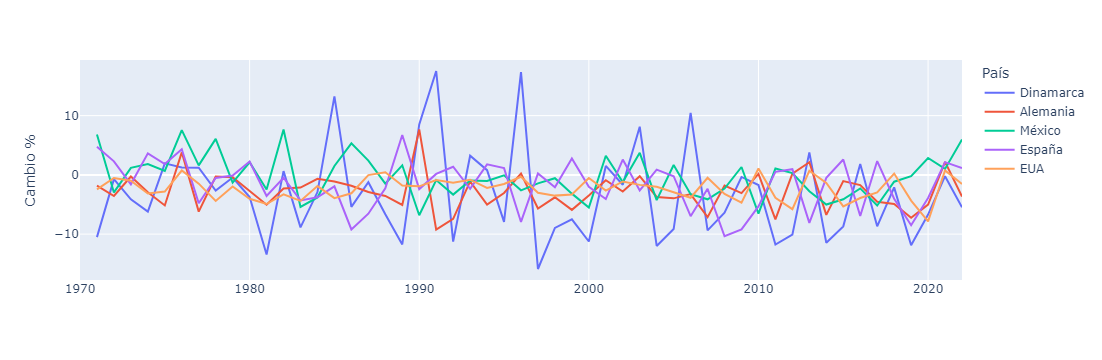

In [37]:
co2_ejemplo['cambio_porcentual'] = co2_ejemplo.groupby('Entity')['Annual CO₂ emissions per GDP (kg per international-$)'].pct_change() * 100


# Creación de la gráfica
fig = px.line(co2_ejemplo, x='Year', y='cambio_porcentual', color='Entity',
              labels={
                  'Year': '',
                 'cambio_porcentual': 'Cambio %',
                  'Entity': 'País'
              }
             )

# Mostrar la gráfica
fig.show()


In [36]:
co2_ejemplo

,Entity,Code,Year,Annual CO₂ emissions per GDP (kg per international-$),cambio_porcentual
4040,Dinamarca,DNK,1970,0.622482,NaN
4041,Dinamarca,DNK,1971,0.557057,-10.510451
4042,Dinamarca,DNK,1972,0.553091,-0.711947
4043,Dinamarca,DNK,1973,0.530288,-4.122688
4044,Dinamarca,DNK,1974,0.497428,-6.196783
...,...,...,...,...,...
16306,EUA,USA,2018,0.296711,0.225826
16307,EUA,USA,2019,0.283818,-4.345284
16308,EUA,USA,2020,0.261526,-7.854290
16309,EUA,USA,2021,0.263475,0.745233
